Modelo de Classificação

Classificar o preço em baixo, medio, alto e muito alto

In [ ]:
import pandas as pd

df = pd.read_csv("dados_sobre_casas.csv")

# Atualiza o status dos pedidos na lista
df.head(5)

,salario_medio_moradores_regiao,idade_media_casas_regiao,quantidade_media_comodos_regiao,quantidade_media_quartos_regiao,populacao_regiao,valor_casa
0,79545,5,7,4,23086,1059034
1,79248,6,6,3,40173,1505891
2,61287,5,8,5,36882,1058988
3,63345,7,5,3,34310,1260617
4,59982,5,7,4,26354,630943


In [ ]:
pd.set_option("display.float_format", lambda x: "%.2f" % x)
df.valor_casa.describe()

count      5000.00
mean    1232072.66
std      353117.62
min       15939.00
25%      997577.50
50%     1232669.00
75%     1471210.00
max     2469066.00
Name: valor_casa, dtype: float64

In [ ]:
df["classificacao_casa"] = pd.qcut(
    df.valor_casa, q=4, labels=["baixo", "medio", "alto", "muito alto"]
)
df.head()

,salario_medio_moradores_regiao,idade_media_casas_regiao,quantidade_media_comodos_regiao,quantidade_media_quartos_regiao,populacao_regiao,valor_casa,classificacao_casa
0,79545,5,7,4,23086,1059034,medio
1,79248,6,6,3,40173,1505891,muito alto
2,61287,5,8,5,36882,1058988,medio
3,63345,7,5,3,34310,1260617,alto
4,59982,5,7,4,26354,630943,baixo


<Axes: xlabel='classificacao_casa'>

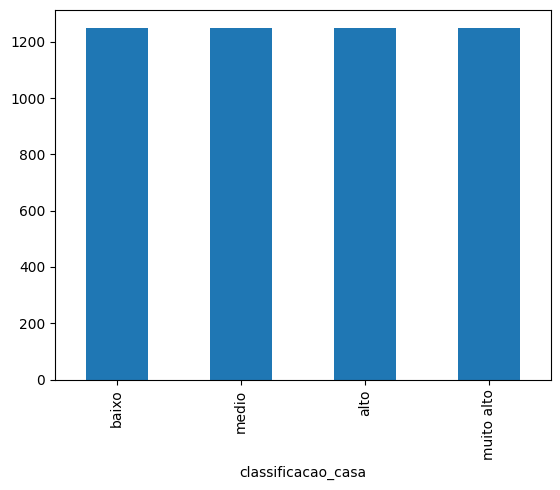

In [6]:
df.classificacao_casa.value_counts().plot.bar()

In [35]:
X = df.drop(columns=["valor_casa", "classificacao_casa"])
y = df.classificacao_casa

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=78
)

from sklearn.linear_model import LogisticRegression

class_model_1 = LogisticRegression(max_iter=10000)
class_model_1.fit(X_train.values, y_train)

f:\Fiap\FIAP\env_311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000)

In [36]:
novo_input = X_train.iloc[0]
prediction = class_model_1.predict([novo_input])

prediction

array(['muito alto'], dtype=object)

In [37]:
y_train.head(1)

3035    muito alto
Name: classificacao_casa, dtype: category
Categories (4, object): ['baixo' < 'medio' < 'alto' < 'muito alto']

In [38]:
from sklearn.metrics import accuracy_score

predicoes = class_model_1.predict(X_test.values)

accuracy_score(y_test, predicoes)

0.722

In [39]:
pd.DataFrame(zip(y_test, predicoes), columns=['real', 'modelo'])

,real,modelo
0,medio,baixo
1,alto,alto
2,medio,medio
3,alto,medio
4,baixo,baixo
...,...,...
995,medio,medio
996,medio,medio
997,baixo,baixo
998,baixo,medio
